# **Loading Libraries & dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# **EDA**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

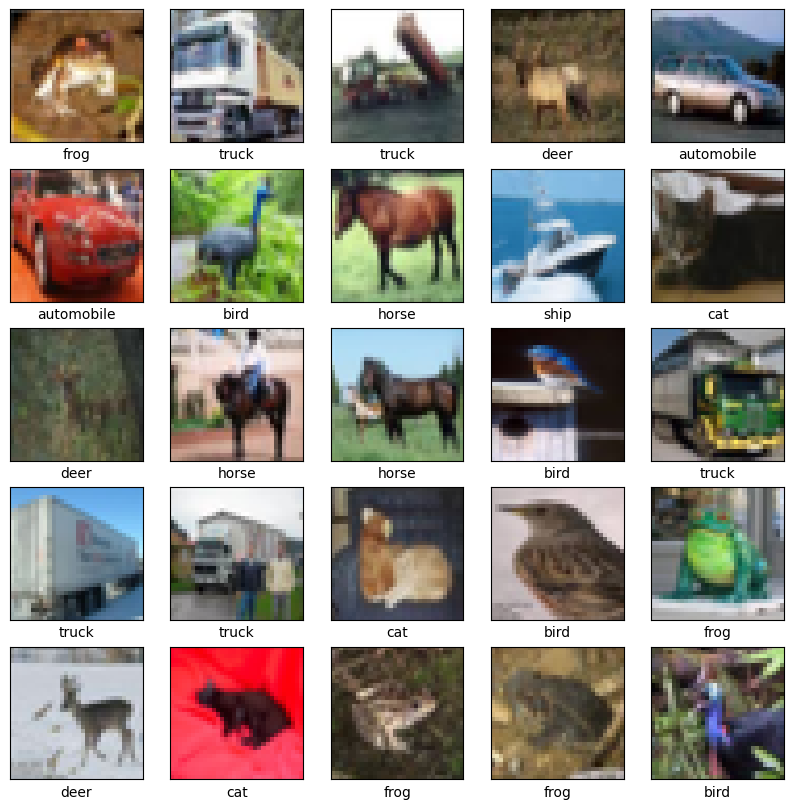

In [ ]:
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_sample_images(x_train, y_train, class_names)


## **Normalizing data**

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

# **Building** THE **Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', ),
    layers.Flatten(),   #COnverting PoolingLayer output(image) into 1D Vector
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),   # Fully Connected Layer
    layers.Dropout(0.5),
    layers.Dense(10)    # Output Layer (number of neurons = no. of classes in dataset)
])

## **Compiling the model**

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6654 - accuracy: 0.4099 - val_loss: 1.4111 - val_accuracy: 0.5207
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3635 - accuracy: 0.5421 - val_loss: 1.1972 - val_accuracy: 0.6070
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2260 - accuracy: 0.6009 - val_loss: 1.0966 - val_accuracy: 0.6407
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1413 - accuracy: 0.6400 - val_loss: 1.0475 - val_accuracy: 0.6688
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0786 - accuracy: 0.6651 - val_loss: 1.0428 - val_accuracy: 0.6710
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0297 - accuracy: 0.6849 - val_loss: 0.9848 - val_accuracy: 0.6969
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9870 - accuracy: 0.7021 - val_loss: 0.9443 - val_accuracy

## **Evaluating** the **Model**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.9585 - accuracy: 0.7421 - 663ms/epoch - 2ms/step
Test accuracy: 0.7421000003814697


## **Visualizing**

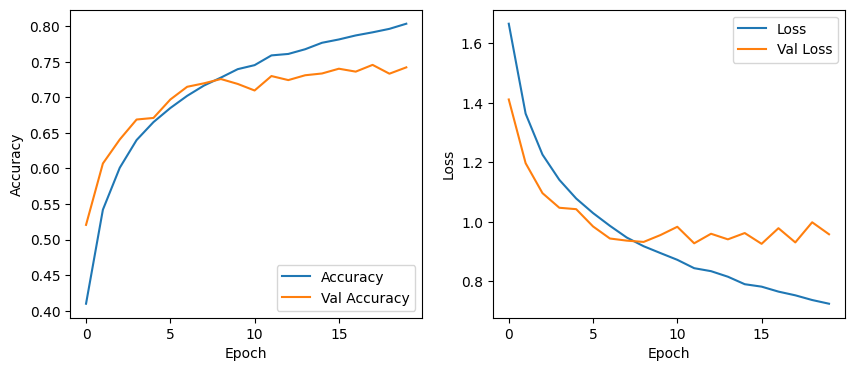

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
